In [689]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [690]:
def getFeatures(factor):
    scaler = StandardScaler(with_mean=False, with_std=True)
    df_scaled = scaler.fit_transform(factor)
    pca = PCA(n_components=1)
    transformed_data = pca.fit_transform(df_scaled)
    print(pca.explained_variance_ratio_)
    return transformed_data

In [691]:
df = pd.read_excel('./handledData.xlsx')
print(df)

      Unnamed: 0    id  y  city  mar_status  age  xaccount_age  cred_limit  \
0              0     2  0    52           0   32            10       20000   
1              1    17  0    35           0   34            17       28500   
2              2    22  0    40           0   28            17        5000   
3              3    27  0    21           2   26            19       60000   
4              4    29  0     1           1   36           138       46000   
...          ...   ... ..   ...         ...  ...           ...         ...   
9581        9581  9984  1    89           0   34            22        2000   
9582        9582  9989  1   104           0   53             7        2250   
9583        9583  9990  1    16           0   34            15       50000   
9584        9584  9993  1    72           0   38             7       30000   
9585        9585  9996  1   125           0   32            12       30000   

      this_bill_rate  this_bill_mp  ...  consume_num_session6  

In [692]:
df['last_mp_days'] = 9999 - df['last_mp_days']

In [693]:

factor_R = df[["last_mp_days",'xaccount_age']]
factor_F = df[['consume_num_session12', 'consume_num_session6', 'consume_num_session3',
               'consume_num_session', 'six_bill_num', 'six_cycle_mp_num', 'epp_nbr_12m'
               ]]
factor_M = df[['six_bill_avg_amt', 'consume_amt_session12', 'consume_amt_session6',
               'consume_amt_session3', 'consume_amt_session', 'six_cycle_mp_avg_amt'
               ]]
factor_N = df[['six_bill_low_repay_num', 'six_bill_avg_debt_rate']]

In [694]:
feature_R = getFeatures(factor_R)
feature_F = getFeatures(factor_F)
feature_M = getFeatures(factor_M)
feature_N = getFeatures(factor_N)

[0.63047127]
[0.53292194]
[0.71817122]
[0.51816634]


In [695]:
feature1 = pd.DataFrame(feature_R, columns=['feature'])
feature2 = pd.DataFrame(feature_F, columns=['feature'])
feature3 = pd.DataFrame(feature_M, columns=['feature'])
feature4 = pd.DataFrame(feature_N, columns=['feature'])

In [696]:
quantiles = feature1['feature'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
quantiles

0.0   -1.139206
0.2   -1.003177
0.4   -0.785532
0.6    0.476973
0.8    0.873984
1.0    4.181142
Name: feature, dtype: float64

In [697]:
bins = [-np.inf, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], np.inf]
feature1['quintile'] = np.digitize(feature1['feature'], bins)
feature1

,feature,quintile
0,0.615572,4
1,-0.703915,3
2,-0.703915,3
3,-0.649504,3
4,4.097592,5
...,...,...
9581,0.930546,5
9582,-0.975972,2
9583,0.746609,4
9584,0.527149,4


In [698]:
quantiles = feature2['feature'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
bins = [-np.inf, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], np.inf]
feature2['quintile'] = np.digitize(feature2['feature'], bins)
feature2

,feature,quintile
0,-0.497415,3
1,1.074445,5
2,-0.150728,4
3,2.111500,5
4,0.565410,5
...,...,...
9581,-0.781247,2
9582,-0.786455,2
9583,11.664120,5
9584,-0.602576,3


In [699]:
quantiles = feature3['feature'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
bins = [-np.inf, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], np.inf]
feature3['quintile'] = np.digitize(feature3['feature'], bins)
feature3

,feature,quintile
0,-0.473913,3
1,1.711420,5
2,0.473500,4
3,6.229929,5
4,3.616218,5
...,...,...
9581,-1.243306,1
9582,-1.122359,1
9583,2.013792,5
9584,0.317023,4


In [700]:
quantiles = feature4['feature'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
bins = [-np.inf, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], np.inf]
feature4['quintile'] = np.digitize(feature4['feature'], bins)
feature4['quintile'] = feature4['quintile'].map({1: 5, 2: 4,3:3, 4: 2, 5: 1})
feature4

,feature,quintile
0,-0.056785,2
1,-0.491470,4
2,-0.282813,3
3,-0.130009,3
4,-0.280136,3
...,...,...
9581,-0.374761,3
9582,-0.446775,3
9583,-0.194359,3
9584,1.127066,1


In [701]:
# 计算各指标的熵值
def calculate_entropy(series):
    n = len(series)
    probabilities = series / series.sum(axis=0)
    entropy = -sum(probabilities * np.log(probabilities + 1e-10)) / np.log(n) # 避免对数为负无穷
    return entropy

In [702]:
scaler = MinMaxScaler()
feature1['feature'] = scaler.fit_transform(feature1['feature'].to_numpy().reshape(-1, 1))
feature2['feature'] = scaler.fit_transform(feature2['feature'].to_numpy().reshape(-1, 1))
feature3['feature'] = scaler.fit_transform(feature3['feature'].to_numpy().reshape(-1, 1))
feature4['feature'] = scaler.fit_transform(feature4['feature'].to_numpy().reshape(-1, 1))
feature1

,feature,quintile
0,0.329824,4
1,0.081816,3
2,0.081816,3
3,0.092043,3
4,0.984296,5
...,...,...
9581,0.389026,5
9582,0.030681,2
9583,0.354453,4
9584,0.313204,4


In [703]:
entropies_R = calculate_entropy(feature1['feature'])
entropies_F = calculate_entropy(feature2['feature'])
entropies_M = calculate_entropy(feature3['feature'])
entropies_N = calculate_entropy(feature4['feature'])

In [704]:
difference_coefficients = 1 - entropies_R + 1 - entropies_F + 1 - entropies_M + 1 - entropies_N
weights_R = (1 - entropies_R) / difference_coefficients
weights_F = (1 - entropies_F) / difference_coefficients
weights_M = (1 - entropies_M) / difference_coefficients
weights_N = (1 - entropies_N) / difference_coefficients

In [705]:
weights_R, weights_F, weights_M, weights_N

(0.262731436572098,
 0.3064785178695703,
 0.34343460724722924,
 0.08735543831110246)

In [706]:
weights2_R, weights2_F, weights2_M, weights2_N = 0.099, 0.345, 0.370, 0.185

In [707]:
part1_R = feature1['feature'].sum() * weights_R
part1_F = feature2['feature'].sum() * weights_F
part1_M = feature3['feature'].sum() * weights_M
part1_N = feature4['feature'].sum() * weights_N
part1 = part1_R + part1_F + part1_M + part1_N

In [708]:
part2_R = feature1['feature'].sum() * weights2_R
part2_F = feature2['feature'].sum() * weights2_F
part2_M = feature3['feature'].sum() * weights2_M
part2_N = feature4['feature'].sum() * weights2_N
part2 = part2_R + part2_F + part2_M + part2_N

In [709]:
T = part2 / (part1 + part2)
U = part1 / (part1 + part2)
weights3_R = weights2_R * T + weights_R * U
weights3_F = weights2_F * T + weights_R * U
weights3_M = weights2_M * T + weights_M * U
weights3_N = weights2_N * T + weights_N * U
weights3_M

0.354310134937163

In [710]:
feature1['R_S'] = feature1['quintile'] * weights3_R
feature2['F_S'] = feature2['quintile'] * weights3_F
feature3['M_S'] = feature3['quintile'] * weights3_M
feature4['N_S'] = feature4['quintile'] * weights3_N

In [711]:
feature = pd.concat([feature1['R_S'], feature2['F_S'], feature3['M_S'], feature4['N_S']], axis=1)

In [712]:
feature['S'] = feature['R_S'] + feature['F_S'] + feature['M_S'] + feature['N_S']

In [713]:
feature

,R_S,F_S,M_S,N_S,S
0,0.782808,0.889233,1.062930,0.254660,2.989631
1,0.587106,1.482056,1.771551,0.509319,4.350031
2,0.587106,1.185644,1.417241,0.381990,3.571980
3,0.587106,1.482056,1.771551,0.381990,4.222702
4,0.978510,1.482056,1.771551,0.381990,4.614105
...,...,...,...,...,...
9581,0.978510,0.592822,0.354310,0.381990,2.307631
9582,0.391404,0.592822,0.354310,0.381990,1.720526
9583,0.782808,1.482056,1.771551,0.381990,4.418403
9584,0.782808,0.889233,1.417241,0.127330,3.216611


In [714]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

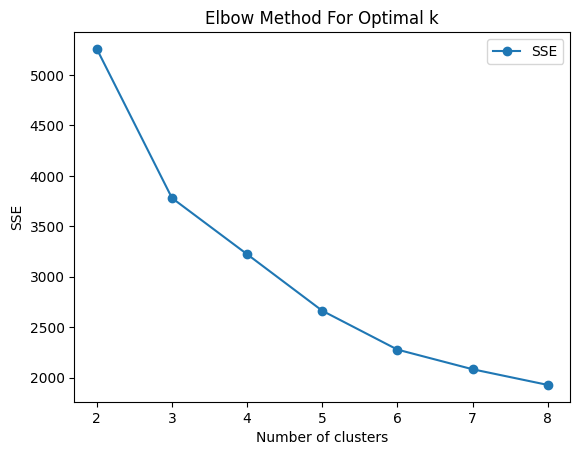

In [715]:
k_values = range(2,9)
sse_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature)
    sse_scores.append(kmeans.inertia_)

# 绘制Elbow图
plt.plot(k_values, sse_scores, marker='o', label='SSE')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.legend()
plt.show()

In [716]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(feature)
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[0.79458005, 1.35582931, 1.62953119, 0.34308533, 4.12302588],
       [0.44878514, 0.52146032, 1.24354041, 0.35561594, 2.56940181],
       [0.62418995, 0.89683365, 1.57478557, 0.31621442, 3.41202359],
       [0.3949746 , 0.37648923, 0.50466776, 0.39960141, 1.675733  ],
       [0.61195252, 0.87426106, 0.54271122, 0.41788529, 2.44681009],
       [0.67934663, 1.27848538, 0.86556875, 0.45860265, 3.28200342]])

In [717]:
# 1 1 1 2  5   重要价值用户 1679
# 5 5 3 3  16  重要挽留用户 1487
# 3 3 2 1  9   重要保持用户 1599
# 6 6 5 4  21  一般挽留用户 1699
# 4 4 6 5  19  一般保持用户 1465
# 2 2 4 6  14  重要发展用户 1657

In [718]:
clustered_data = {}
for i in range(6):  # 假设有6个簇
    clustered_data[i] = feature[kmeans.labels_ == i]
for i, cluster in clustered_data.items():
    print(f"\nCluster {i}:")
    print(cluster.index)
    print(df.loc[cluster.index, :].describe())


Cluster 0:
Index([   1,    3,    4,    7,   13,   14,   16,   21,   24,   32,
       ...
       9532, 9536, 9542, 9543, 9548, 9559, 9561, 9564, 9577, 9583],
      dtype='int64', length=1679)
        Unnamed: 0            id            y         city   mar_status  \
count  1679.000000   1679.000000  1679.000000  1679.000000  1679.000000   
mean   5033.254318  16472.107207     0.262061    57.362120     0.616438   
std    2816.590673  11900.973506     0.439887    43.081262     0.907191   
min       1.000000     17.000000     0.000000     0.000000     0.000000   
25%    2657.500000   5728.000000     0.000000    16.000000     0.000000   
50%    5127.000000  14568.000000     0.000000    52.000000     0.000000   
75%    7691.500000  26478.000000     1.000000    94.000000     2.000000   
max    9583.000000  39961.000000     1.000000   139.000000     2.000000   

               age  xaccount_age     cred_limit  this_bill_rate  \
count  1679.000000   1679.000000    1679.000000     1679.000000  